In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

# 분자의 3차원 구조 생성하기.

* 일반적으로 분자의 다양한 3차원 구조를 가질 수 있다. 
* 하나의 회전 가능한 단일 결합의 경우 매우 단순하게 생각해도 trans/gauch+/gauch- 세가지의 가능성을 가질 수 있다. 
* 이는 만일 분자가 회전 가능한 단일 결합을 10개를 가지고 있다고 하면 3^10 개의 가능성을 가지고 있다는 뜻이 된다. 
* 그러므로 가장 낮은 에너지를 가지는 3차원 구조를 얻는 것은 매우 계산 시간이 오래 걸리는 일이다. 
* 일반적으로는 이를 해결하기 위해서 다양한 가정을 도입하여 근사적으로 최적의 에너지 구조를 얻는다. 
* RDKit에서는 실험 데이터에서 힌트를 얻어 3D 구조를 생성하는 자체적인 ETDKG 방법을 가지고 있다. 
* ref: https://www.rdkit.org/docs/GettingStartedInPython.html#working-with-3d-molecules
* 분자의 개수가 적다면 Corina와 같은 webserver를 이용할 수 있다. 
* https://www.mn-am.com/online_demos/corina_demo

In [2]:
m = Chem.MolFromSmiles('C1CCC1OC')

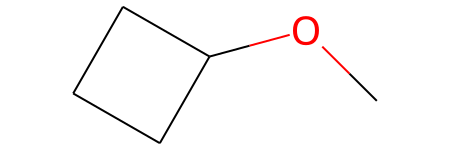

In [3]:
m

* **주의!** 정확한 3차원 구조를 얻기 위해서는 수소를 붙이는 것이 필수적이다!

In [4]:
m2 = Chem.AddHs(m) ## AddHs 메소드를 사용하면 새로운 분자 instance를 return. 

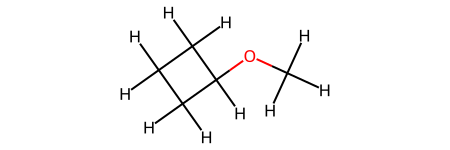

In [5]:
m2

* AllChem의 **EmbedMolecule** 메쏘드를 이용해서 분자의 3차원 구조를 계산한다. 

In [6]:
AllChem.EmbedMolecule(m2)

0

* Error 없이 3차원 구조가 생성되면 0 그렇지 않으면 다른 값이 리턴됨. 

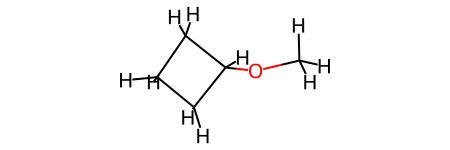

In [7]:
m2

* EmbedMolecule로 얻은 3차원 구조는 근사적인 3차원 구조이다. 

* MMFF force field를 이용하여 한 번 더 최적화를 수행한다. 

In [8]:
AllChem.MMFFOptimizeMolecule(m2)

0

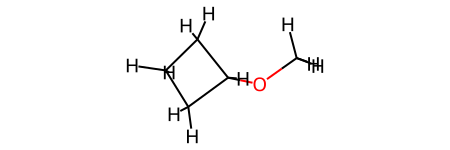

In [9]:
m2

## 여러개의 3차원 구조 생성하기. 

* 예상되는 최적의 구조 뿐만 아니라 다양한 3차원 구조를 얻어야 하는 경우가 많이 있다.
* Conformational isomer
* 이럴 때는 EmbedMultipleConfs 메쏘드를 사용하면 된다. 

In [10]:
m = Chem.MolFromSmiles('C1CCC1OC')

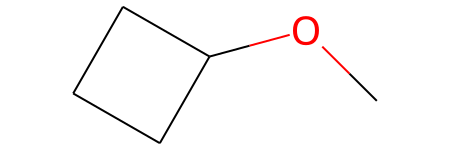

In [11]:
m

In [12]:
m2=Chem.AddHs(m)

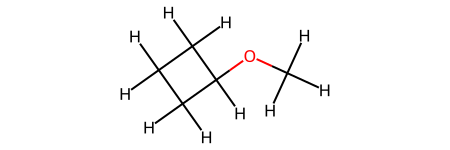

In [13]:
m2

In [14]:
# 10개의 구조를 생성한다. 
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)

In [15]:
cids

In [16]:
print(len(cids))

10


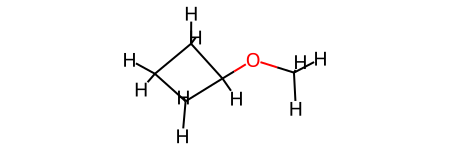

In [17]:
m2 # 첫번째 3D 구조 확인. 

* 여러개의 구조를 출력하기 위해서는 MolToMolBlock, MolToMolFile, MolToPDBFile 등의 method에서 confId 옵션을 사용하면 된다. 

In [18]:
print(Chem.MolToMolBlock(m2, confId=9))


     RDKit          3D

 16 16  0  0  0  0  0  0  0  0999 V2000
   -0.6357   -0.9709   -0.9334 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8961   -0.4754   -0.2549 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9996    0.1994    0.7645 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1077    0.1127   -0.2294 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3620   -0.1936    0.2486 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.3493    0.6860   -0.1384 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4286   -2.0071   -0.6350 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7364   -0.8713   -2.0364 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4822    0.2583   -0.8596 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5482   -1.2678    0.1607 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9231   -0.4400    1.6645 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3291    1.2492    0.9558 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1536    1.0360   -0.8483 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.1785    1.7288    0

* conformational isomer 사이의 구조 차이. 
* RMS: root mean square deviation

In [19]:
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))

9


* 첫번째 conformer와 나머지 conformer 사이의 RMSD 계산.
* 몇 A 차이가 나는지? 

In [20]:
print(rmslist)

[1.3337222314488852, 1.482339357606691, 1.0043640582392108, 1.3477434515466329, 1.3796465781611846, 0.9225487846825888, 1.1446064425440359, 1.1585751463736393, 1.126656095042884]


* 특정 conformer 사이의 rms 계산
* 예를 들어 1번과 9번 사이의 rms 계산을 수행한다고 하면 다음과 같이 하면 된다. 
* **AllChem.GetConformerRMS** 메소드를 사용. 

In [21]:
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)

In [22]:
rms

1.278428571009159

* 여러 개의 conformer들을 optimize 하기 위해서는 AllChem.MMFFOptimizeMoleculeConfs 함수를 사용한다. 

In [23]:
result = AllChem.MMFFOptimizeMoleculeConfs(m2)

* 결과로는 (not_converged, energy) 두 개의 값을 가지는 tuple을 리턴한다. 
* not_converged == 0 이면 수렴되었다는 뜻이고, 1이면 수렴되지 않았다는 뜻이다. 

In [24]:
print(result)

[(0, 10.728830581838562), (0, 10.728830578774103), (0, 10.7288305800645), (0, 10.728830583022583), (0, 10.728830582135293), (0, 11.677582320637974), (0, 10.72883057756982), (0, 10.728830577522144), (0, 10.728830577947043), (0, 10.728830580922297)]


In [25]:
len(result)

10

* Optimize된 3차원 구조를 출력할 수 있다. 

In [26]:
print(Chem.MolToMolBlock(m2, confId=9))


     RDKit          3D

 16 16  0  0  0  0  0  0  0  0999 V2000
   -0.5607    0.6904    0.6596 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9171    0.0226    0.3680 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2656   -0.5961   -0.8826 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1010   -0.4373   -0.1714 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1994   -0.0530   -1.0232 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4368    0.1785   -0.3656 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4526    1.6901    0.2235 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2767    0.7295    1.7145 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2151   -0.7163    1.1206 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7526    0.7021    0.1831 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3720    0.0120   -1.7883 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5665   -1.6229   -1.1062 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3557   -1.3211    0.4293 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7625   -0.7273    0

# 분자 구조식 그리기. 

* cdk2.sdf 파일: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/cdk2.sdf
* ref: https://www.rdkit.org/docs/GettingStartedInPython.html#drawing-molecules

In [31]:
from rdkit.Chem import Draw

In [34]:
suppl = Chem.SDMolSupplier("cdk2.sdf")

In [35]:
ms = [x for x in suppl if x is not None] # list comprehension을 이용해서 분자의 리스트를 얻는다. 

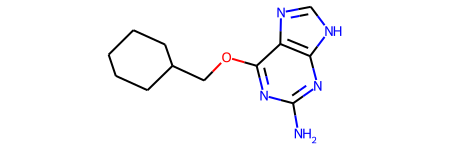

In [36]:
ms[3]

In [37]:
for m in ms: 
    tmp=AllChem.Compute2DCoords(m)

* 그림 파일로 분자를 출력. 

In [38]:
Draw.MolToFile(ms[0],'cdk2_mol1.o.png')

In [39]:
Draw.MolToFile(ms[1],'cdk2_mol2.o.png')

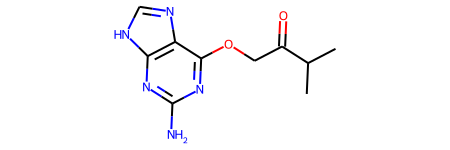

In [40]:
ms[0]

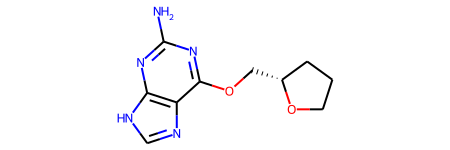

In [41]:
ms[1]

In [42]:
len(ms)

47

### 여러개의 분자 구조를 한 파일에 그리기
* Draw.MolsToGridImage 함수를 이용하자 

In [43]:
img=Draw.MolsToGridImage(ms[:8],
                         molsPerRow=4, # 한 행에 몇 개의 분자를 그릴 것인지? 
                         subImgSize=(200,200), # 각 이미지의 크기. 
                         legends=[x.GetProp("_Name") for x in ms[:8]]) # string의 리스트 받는다. 

In [44]:
type(img)

IPython.core.display.Image

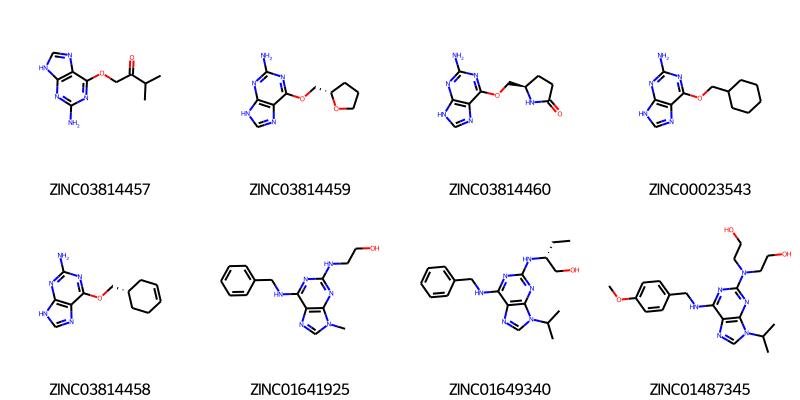

In [45]:
img

### 공통된 구조를 이용해서 정렬하기. 

In [46]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')

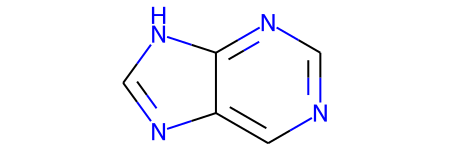

In [47]:
p

* 특정 core 구조를 가지는 분자만 선택. 
* Mol-type class의 HasSubstructMatch 메소드를 이용해서 특정 core 구조를 가지는지 알 수 있다. 

In [48]:
subms = [x for x in ms if x.HasSubstructMatch(p)]

In [49]:
len(subms)

14

In [50]:
len(ms)

47

* ms라는 리스트 안에 있던 47개의 분자 중에서 14개의 분자 만이 core 구조를 가지고 있다. 

* reference 구조의 2차원 좌표 계산

In [51]:
AllChem.Compute2DCoords(p)

0

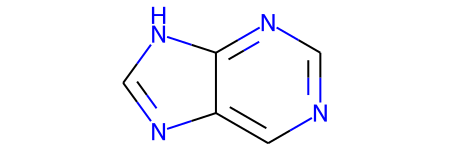

In [52]:
p

ref: https://www.rdkit.org/docs/GettingStartedInPython.html#working-with-2d-molecules-generating-depictions

In [53]:
for m in subms:
    _ = AllChem.GenerateDepictionMatching2DStructure(m,p)

In [54]:
img=Draw.MolsToGridImage(subms, # 14개의 공통된 코어 구조를 가진 분자의 그림 생성. 
                         molsPerRow=3,
                         subImgSize=(400, 400),
                         legends=[x.GetProp("_Name") for x in subms])

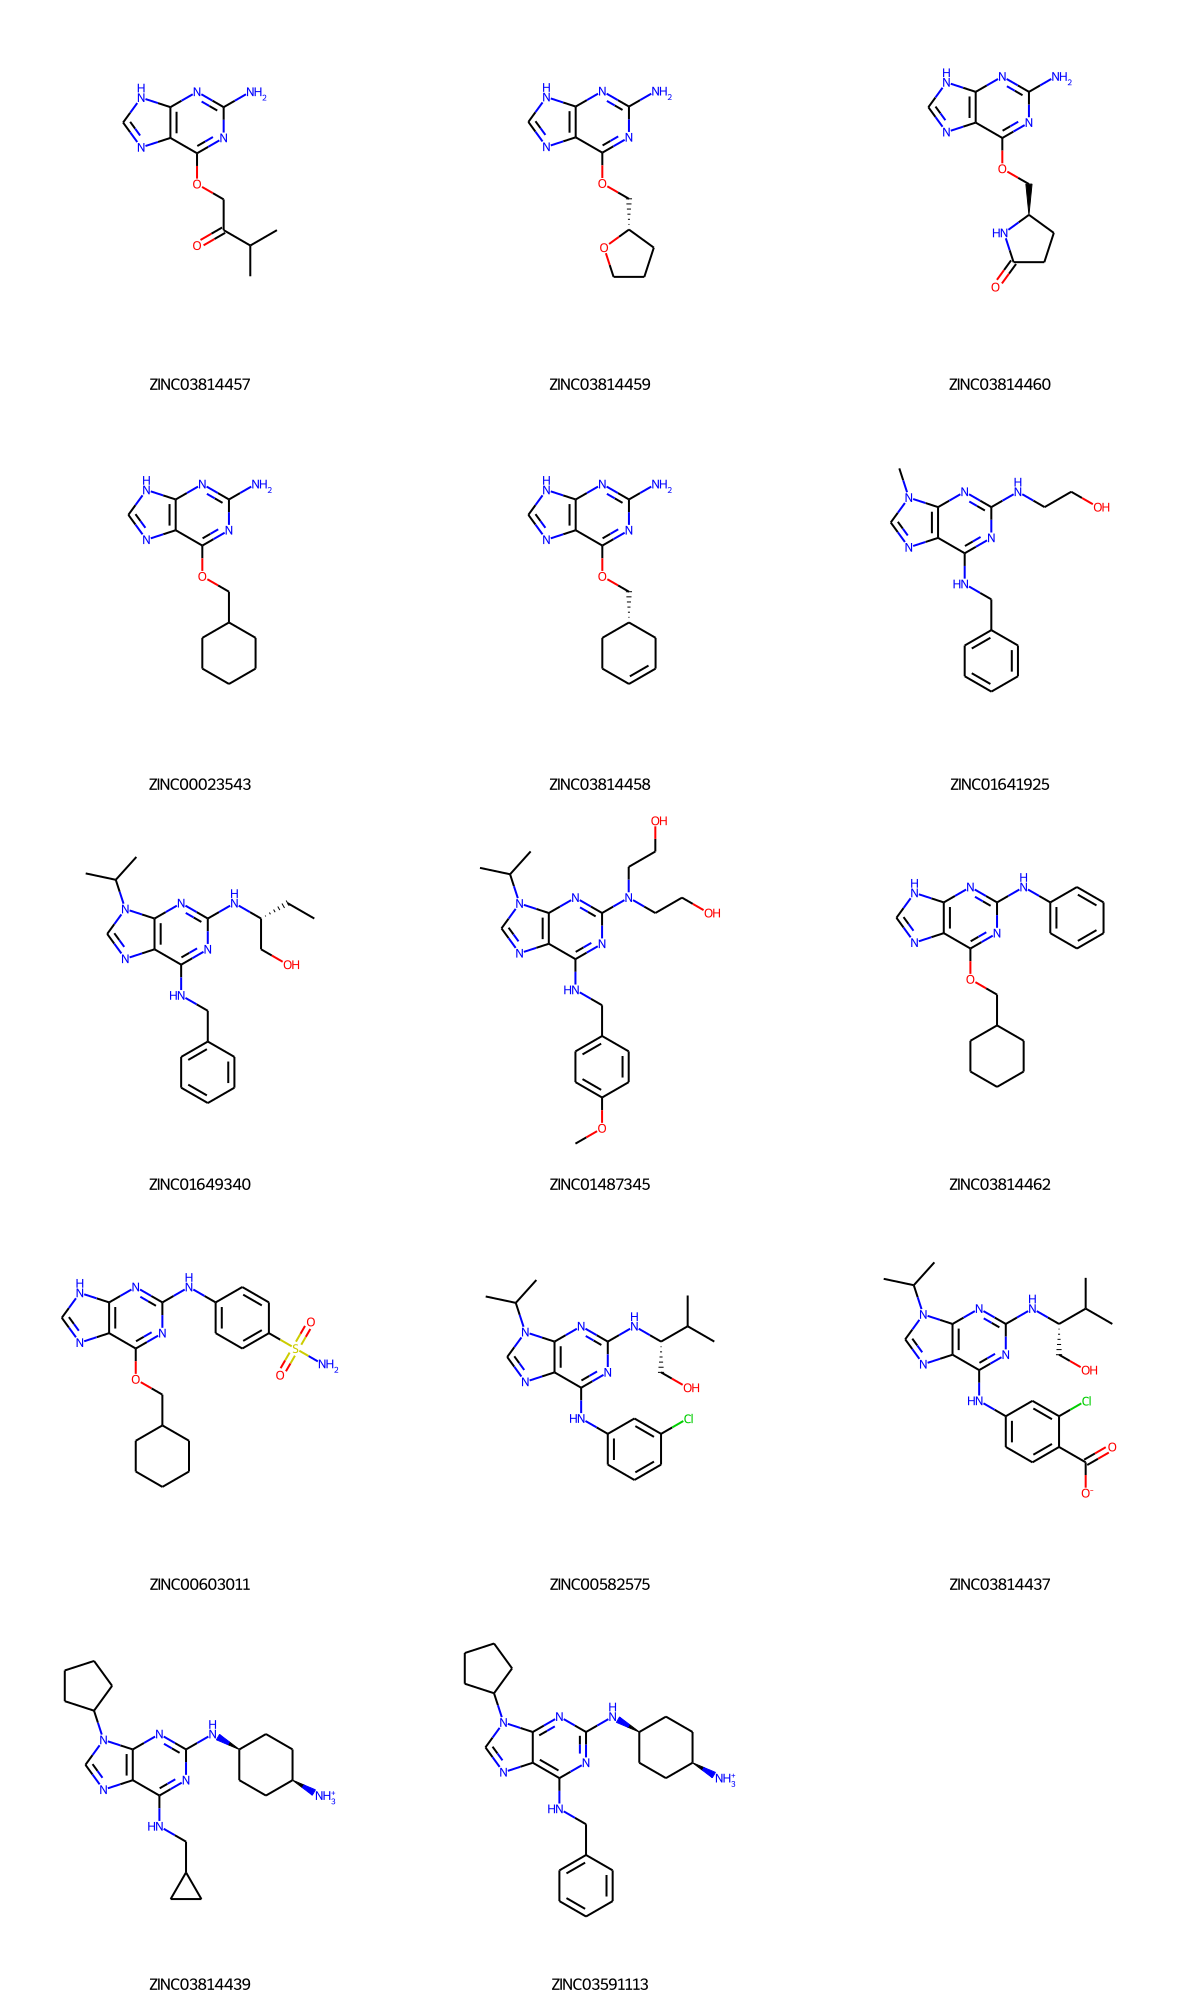

In [55]:
img

### 임의의 label과 함께 출력하기 

* 예제: logP 값을 label로 만들어서 출력하기. 
* logP 계산 함수: https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html

In [56]:
from rdkit.Chem.Crippen import MolLogP
for m in subms:
    logp = MolLogP(m)
    print(logp)
    m.SetProp("LogP", f"logP: {logp:.3f}") # property 설정할 때는 string으로 넣어주어야 한다. 

0.5389999999999999
0.4928999999999992
-0.40750000000000036
1.8941999999999999
1.6702
1.3795999999999995
3.2021000000000015
1.8188999999999997
4.055600000000002
2.702999999999999
4.233000000000002
2.5965
2.7283
3.5185000000000004


In [57]:
img=Draw.MolsToGridImage(subms,
                         molsPerRow=4,
                         subImgSize=(300, 300),
                         legends=[x.GetProp("LogP") for x in subms])

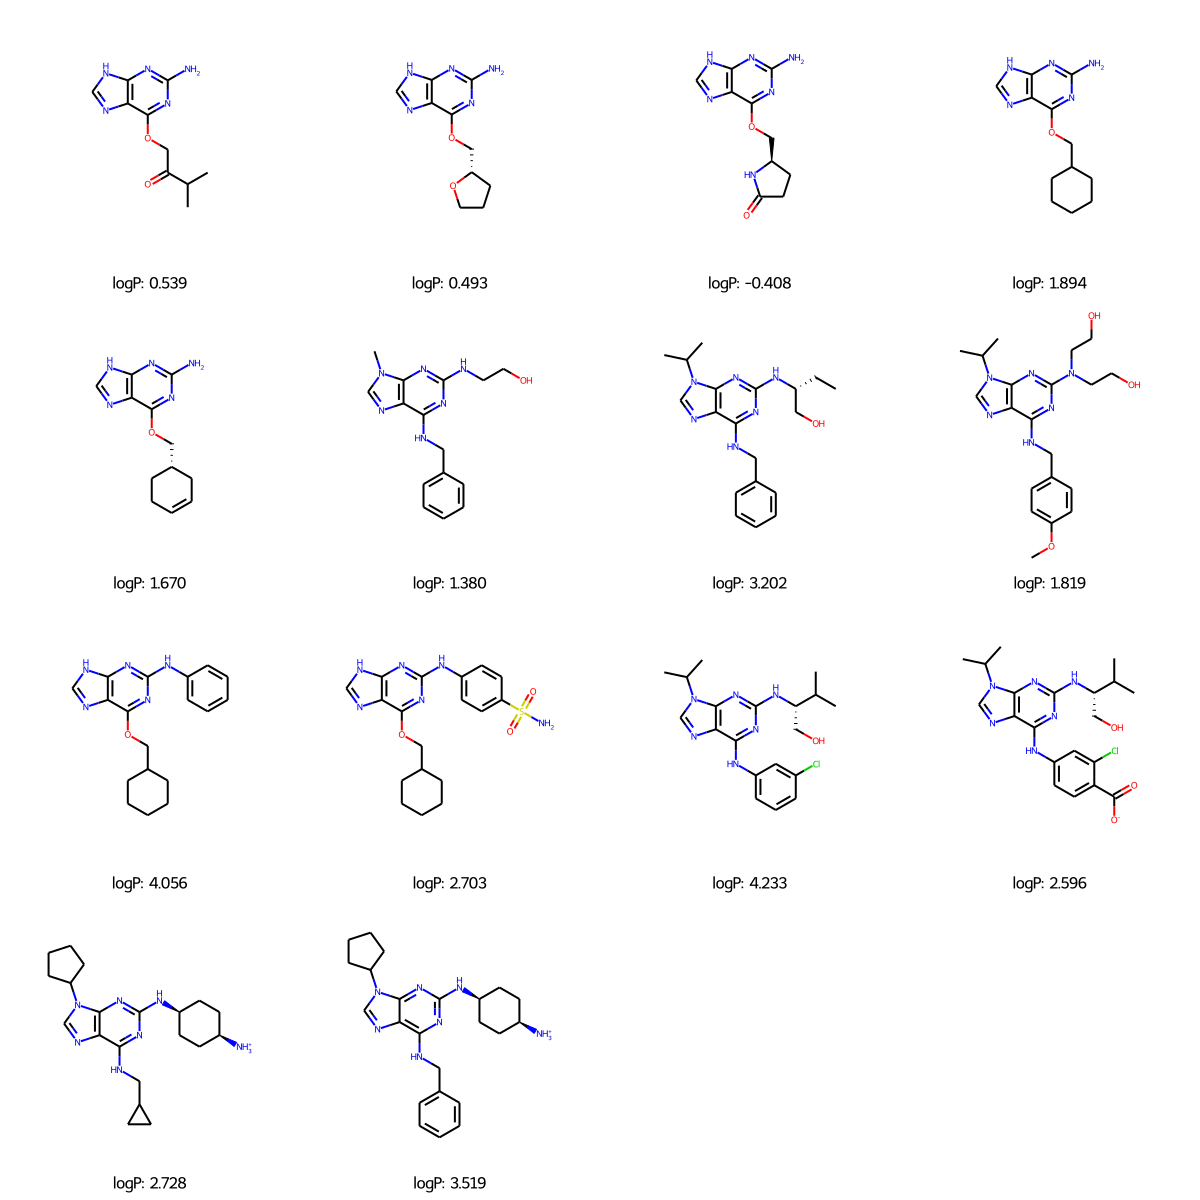

In [58]:
img

## Advanced drawing
* Customized picture를 만들기 위해서 다음 두가지 class를 사용할 수 있다. 
* rdMolDraw2D.MolDraw2DSVG --> SVG 파일을 만들 때. 
* rdMolDraw2D.MolDraw2DCairo --> PNG 파일을 만들 때. 

### 특정 구조에 highlight 주기. 

In [59]:
from rdkit.Chem.Draw import rdMolDraw2D

In [60]:
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')

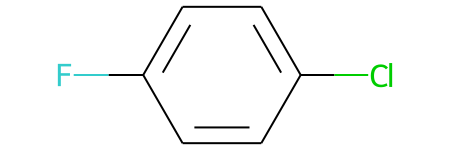

In [61]:
mol

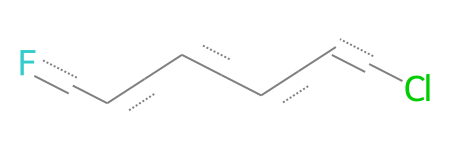

In [62]:
patt

In [63]:
hit_ats = list(mol.GetSubstructMatch(patt))

In [64]:
hit_ats

[7, 6, 5, 4, 2, 3]

* Pattern과 일치하는 bond를 찾는다. 

In [65]:
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
print(hit_bonds)

[6, 5, 4, 3, 2]


* SVG 파일로 저장하기 위해서 rdMolDraw2D.MolDraw2DSVG 를 사용한다.
* 주의: RDKit 2020.3 버젼 이후로 적용. 

In [66]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs

In [67]:
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                    highlightBonds=hit_bonds)

* FinishDrawing 메쏘드를 불러야 그림이 완성된다!

In [68]:
d.FinishDrawing()

In [69]:
type(d)

rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DSVG

In [70]:
help(d.GetDrawCoords)

Help on method GetDrawCoords:

GetDrawCoords(...) method of rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DSVG instance
    GetDrawCoords( (MolDraw2D)self, (Point2D)point) -> Point2D :
        get the coordinates in drawing space for a particular point in molecule space
    
        C++ signature :
            class RDGeom::Point2D GetDrawCoords(class RDKit::MolDraw2D {lvalue},class RDGeom::Point2D)
    
    GetDrawCoords( (MolDraw2D)self, (int)atomIndex) -> Point2D :
        get the coordinates in drawing space for a particular atom
    
        C++ signature :
            class RDGeom::Point2D GetDrawCoords(class RDKit::MolDraw2D {lvalue},int)



In [71]:
print(d.GetDrawingText())

<?xml version='1.0' encoding='iso-8859-1'?>
<svg version='1.1' baseProfile='full'
              xmlns='http://www.w3.org/2000/svg'
                      xmlns:rdkit='http://www.rdkit.org/xml'
                      xmlns:xlink='http://www.w3.org/1999/xlink'
                  xml:space='preserve'
width='500px' height='500px' viewBox='0 0 500 500'>
<!-- END OF HEADER -->
<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='500.0' height='500.0' x='0.0' y='0.0'> </rect>
<path class='bond-2 atom-2 atom-3' d='M 146.0,260.3 L 43.3,260.3' style='fill:none;fill-rule:evenodd;stroke:#FF7F7F;stroke-width:21.9px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-3 atom-2 atom-4' d='M 146.0,260.3 L 197.3,171.3' style='fill:none;fill-rule:evenodd;stroke:#FF7F7F;stroke-width:21.9px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path class='bond-4 atom-4 atom-5' d='M 197.3,171.3 L 300.0,171.3' style='fill:none;fill-rule:evenodd;stroke:#FF7F7F;stroke-w

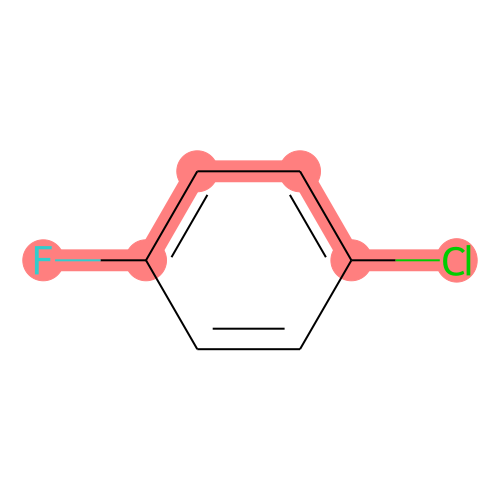

In [72]:
from IPython.display import SVG
SVG(d.GetDrawingText())

### SVG 파일로 저장. 

In [73]:
with open("a.svg", "w") as fp:
    fp.write(d.GetDrawingText())

### 원자와 결합에 주석 달기
* **atomNote**와 **bondNote** 라는 이름의 property를 지정함으로서 표시 가능

In [74]:
mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')

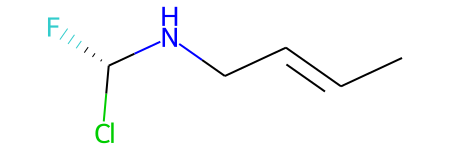

In [75]:
mol

In [76]:
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # PNG 파일로 만들겠다. 
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

### Atom Label 사용하기

* https://www.rdkit.org/docs/GettingStartedInPython.html#drawing-molecules
* ChemAxon Extended SMILES and SMARTS - CXSMILES and CXSMARTS
* ref: https://docs.chemaxon.com/display/docs/chemaxon-extended-smiles-and-smarts-cxsmiles-and-cxsmarts.md

In [77]:
smi = 'c1nc(*)ccc1* |$C0;;C3;R1;;;;R2$|' # extended SMILES grammar

In [78]:
mol = Chem.MolFromSmiles(smi)

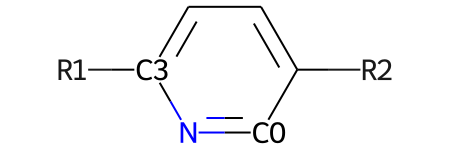

In [79]:
mol

In [80]:
smi = 'c1nc(*)ccc1*'
mol = Chem.MolFromSmiles(smi)

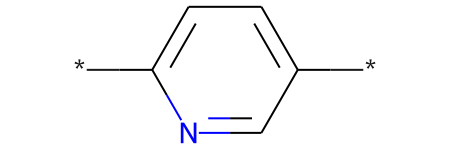

In [81]:
mol

* Atom Label 예시2

In [82]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|' # extended SMILES grammar
mol = Chem.MolFromSmiles(smi)

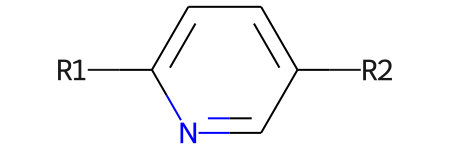

In [83]:
mol

In [84]:
mol.GetAtomWithIdx(2).SetProp("atomLabel","C1") # 2번 원자의 atom label을 C1으로 주겠다. 
mol.GetAtomWithIdx(4).SetProp("atomLabel","C2") # 4번 원자의 atom label을 C2라고 주겠다. 
d = rdMolDraw2D.MolDraw2DCairo(250, 250) # PNG 파일을 준비. 
rdMolDraw2D.PrepareAndDrawMolecule(d, mol)
d.WriteDrawingText("annotation3.png") # 파일로 저장. 

In [85]:
from IPython.display import Image # PNG 파일을 Jupyter에서 보겠다. 

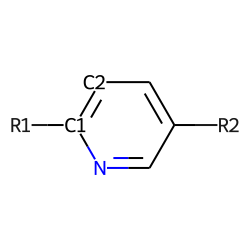

In [86]:
Image(d.GetDrawingText())

### PNG 파일로 저장. 

In [87]:
with open("a.png", "wb") as fp:
    fp.write(d.GetDrawingText())

# 부분 구조 탐색 (Substructure Searching)

* 특정 구조를 가지고 있는 분자들을 찾아낼 때. 
* ref: https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching

In [88]:
m = Chem.MolFromSmiles('c1ccccc1O')

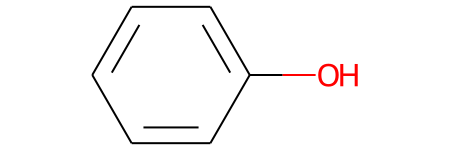

In [89]:
m

In [90]:
patt = Chem.MolFromSmarts('ccO') # SMARTS 패턴을 읽어들일 때는 MolFromSmarts를 사용한다. 

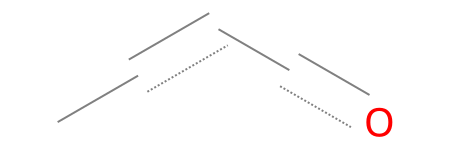

In [91]:
patt

In [92]:
m.HasSubstructMatch(patt)

True

In [93]:
m.GetSubstructMatch(patt) # Pattern과 일치하는 부분의 원자들의 index의 tuple을 리턴. 

(0, 5, 6)

* Pattern에 해당되는 Atom을 확인해보자. 

In [94]:
for atom in m.GetAtoms():
    i = atom.GetIdx()
    atom.SetProp("atomNote", str(i))

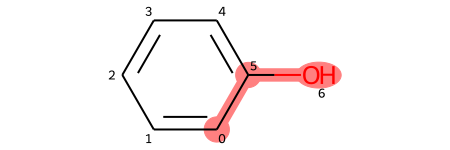

In [95]:
m

* GetSubstructMatch 는 하나의 tuple만 리턴한다. 
* GetSubstructMatches 는 해당되는 모든 atom index로 이루어진 tuple을 리턴한다. 

In [96]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

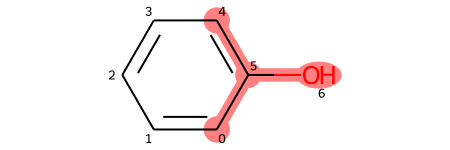

In [97]:
m

### 특정 구조를 가진 분자 찾아내기

In [98]:
patt = Chem.MolFromSmarts('c[NH1]')

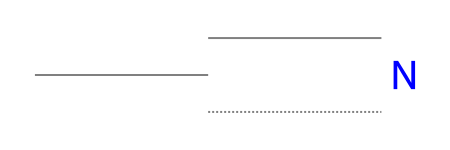

In [99]:
patt

In [100]:
matches = []
suppl = Chem.SDMolSupplier('actives_5ht3.sdf')
for mol in suppl:
    if mol.HasSubstructMatch(patt):
        matches.append(mol)
        #print(Chem.MolToSmiles(mol))
    else:
        print("False:", Chem.MolToSmiles(mol))
len(matches)

OSError: File error: Bad input file actives_5ht3.sdf

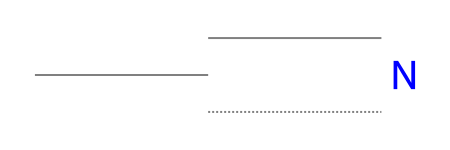

In [101]:
patt

In [102]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')

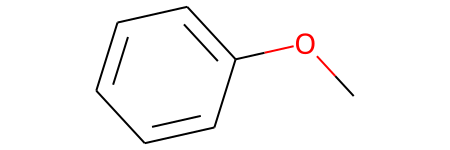

In [103]:
m

In [104]:
m.HasSubstructMatch(Chem.MolFromSmiles('COC'))

True

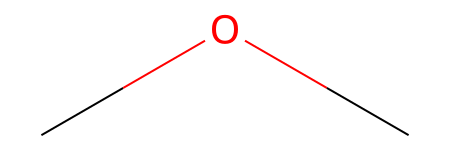

In [105]:
Chem.MolFromSmiles('COC')

In [106]:
m2 = Chem.MolFromSmiles('COC')

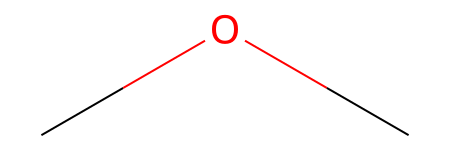

In [107]:
m2

* SMARTS와 SMILES가 항상 동일하지는 않다. 

In [108]:
m3 = Chem.MolFromSmarts('COC')

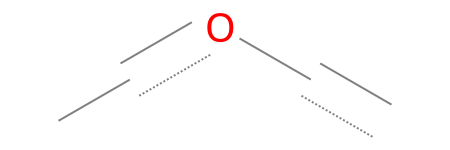

In [109]:
m3

In [110]:
m.HasSubstructMatch(m3)

False

* SMARTS 로 표현할 때는 한쪽 끝이 aromatic carbon이어야 한다. 

In [111]:
m.HasSubstructMatch(Chem.MolFromSmarts('COc'))

True

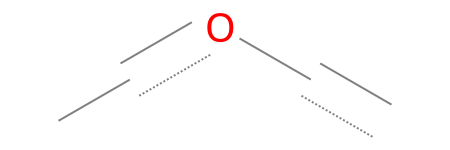

In [112]:
Chem.MolFromSmarts('COc')

* 일반적으로 substructure search를 할 때는 chirality는 사용되지 않는다. 

In [113]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')

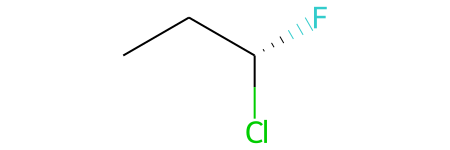

In [114]:
m

In [115]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'))

True

In [116]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'))

True

* HasSubstructMatch의 기본값은 stereochemistry 무시. 

In [117]:
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

In [118]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True)

True

In [119]:
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'), useChirality=True)

False

In [120]:
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'), useChirality=True)

True

## 특정 부분 구조 치환하기/변화시키기 Substructure-based transformations

In [121]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')

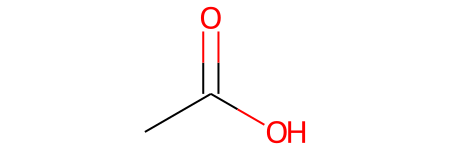

In [122]:
m

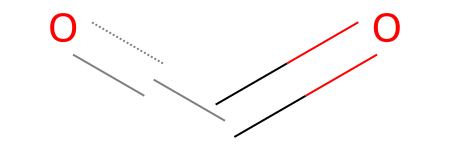

In [123]:
patt

* 특정 SMARTS 패턴에 해당하는 부분을 지우고 싶다. 
* AllChem.DeleteSubstructs 사용

In [124]:
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'C'

#### 치환 (replacement)

In [125]:
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]') # $(SMARTS)를 사용하면 atom environment를 표현할 수 있다. 
m = Chem.MolFromSmiles('CC(=O)N')

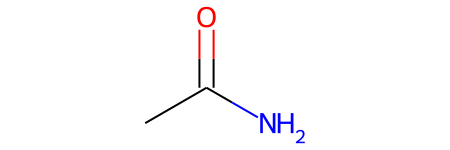

In [126]:
m

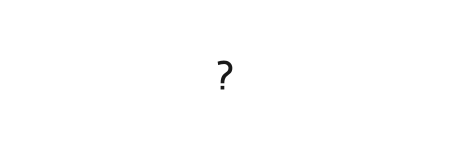

In [127]:
patt

* 특정 부분을 치환 할 때에는 AllChem.ReplaceSubstructs 함수를 사용. 
* 특정 functional group이 분자안에 여러개 존재한다면 여러개의 치환된 분자를 리턴. 

In [128]:
rms = AllChem.ReplaceSubstructs(m,patt,repl)

In [129]:
rms

(<rdkit.Chem.rdchem.Mol at 0x2d212a1d890>,)

In [130]:
Chem.MolToSmiles(rms[0])

'COC(C)=O'

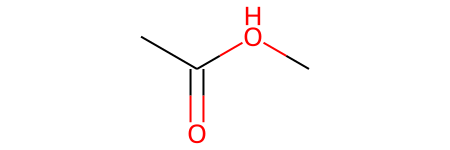

In [131]:
rms[0]

#### Sidechain replacement

In [132]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')

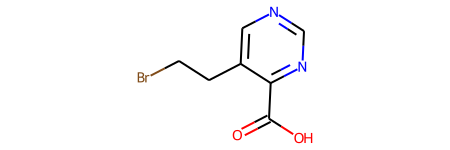

In [133]:
m1

In [134]:
core = Chem.MolFromSmiles('c1cncnc1')

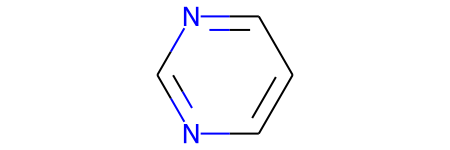

In [135]:
core

In [136]:
tmp = Chem.ReplaceSidechains(m1,core) # Core구조를 제외한 부분을 *로 치환해줌. 

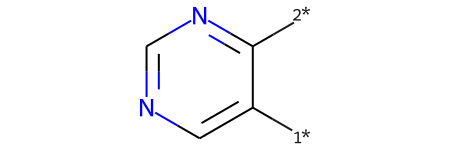

In [137]:
tmp

In [138]:
Chem.MolToSmiles(tmp)

'[1*]c1cncnc1[2*]'

#### Removing Cores : 코어구조 삭제하기
* Side chain만 남기기. 

In [139]:
tmp = Chem.ReplaceCore(m1,core)

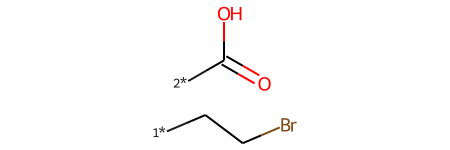

In [140]:
tmp # 2개의 fragment의 집합. 

In [141]:
Chem.MolToSmiles(tmp)

'[1*]CCBr.[2*]C(=O)O'

In [142]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')

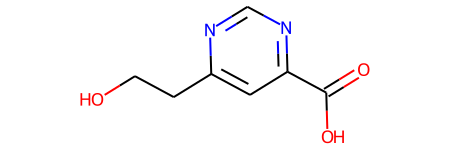

In [143]:
m1

* Atom index에 따라서 * 를 labeling 하고 싶을 때. 
* labelByIndex=True

In [144]:
tmp=Chem.ReplaceCore(m1, core, labelByIndex=True)

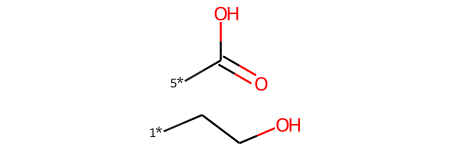

In [145]:
tmp

In [146]:
Chem.MolToSmiles(tmp)

'[1*]CCO.[5*]C(=O)O'

* Split two fragments into two independent molecules. 
* Chem.GetMolFrags 를 이용하면 두 개의 독립적인 분자 또는 fragment를 나눌 수 있다. 

In [147]:
rs = Chem.GetMolFrags(tmp, asMols=True)

In [148]:
len(rs)

2

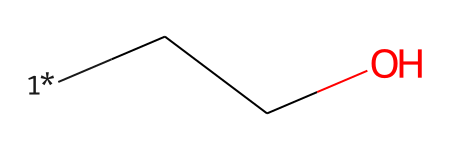

In [149]:
rs[0]

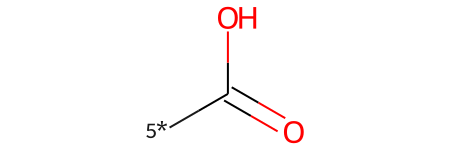

In [150]:
rs[1]

In [151]:
type(rs[1])

rdkit.Chem.rdchem.Mol

* asMols = False 를 사용하면 atom index의 tuple 이 리턴된다. 

In [152]:
rs2 = Chem.GetMolFrags(tmp)

In [153]:
type(rs2[0])

tuple

In [154]:
rs2

((0, 1, 2, 6), (3, 4, 5, 7))

In [155]:
rs2[0]

(0, 1, 2, 6)

In [156]:
rs2[1]

(3, 4, 5, 7)

## Murcko Decomposition
### BM-scaffold 얻기 

In [157]:
from rdkit.Chem.Scaffolds import MurckoScaffold

![bm](bm2.png)

In [158]:
m1 = ms[0]

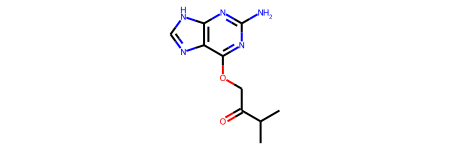

In [159]:
m1

* MurckoScaffold.GetScaffoldForMol 함수를 사용해서 BM scaffold를 얻을 수 있다. 

In [160]:
core = MurckoScaffold.GetScaffoldForMol(m1)

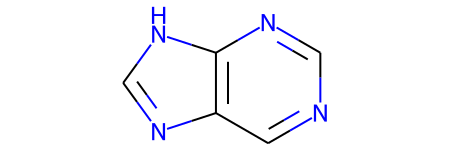

In [161]:
core

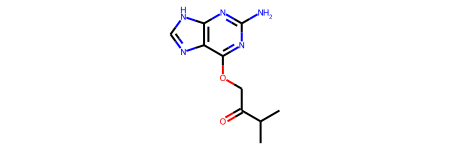

In [162]:
m1

* More general scaffold 얻기 위해서는 
* MurckoScaffold.MakeScaffoldGeneric 함수를 사용. 

In [163]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)

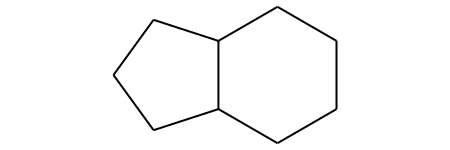

In [164]:
fw

In [165]:
Chem.MolToSmiles(fw)

'C1CCC2CCCC2C1'

## Maximum Common Substructure (MCS)
* MCS 는 여러개의 분자가 모두 가지고 있는 common 구조를 얻어내는 것을 의미한다. 
* Chem 모듈 안의 rdFMCS 모듈을 import

In [166]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")

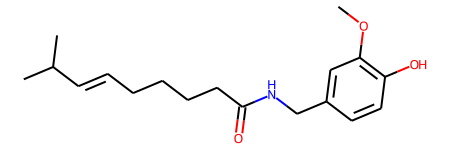

In [167]:
mol1

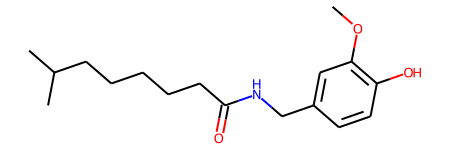

In [168]:
mol2

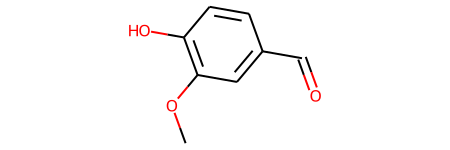

In [169]:
mol3

* MCS 를 찾아내기 위해서 rdFMCS.FindMCS 함수를 사용!

In [170]:
mols = [mol1,mol2,mol3]
res=rdFMCS.FindMCS(mols)
res

In [171]:
res

In [172]:
res.numAtoms

10

In [173]:
res.numBonds

10

In [174]:
res.smartsString

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

* If no MCS is found, res.numAtoms and res.numBonds are 0. 

### Atom and Bond options for MCS

In [175]:
mols = (Chem.MolFromSmiles('NCC'), Chem.MolFromSmiles('OC=C'))

In [176]:
rdFMCS.FindMCS(mols).smartsString

'[#6]'

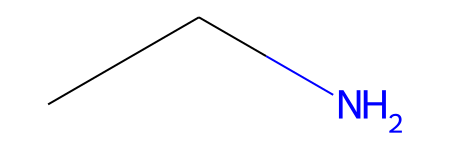

In [177]:
mols[0]

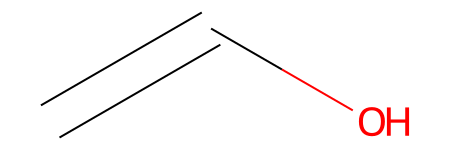

In [178]:
mols[1]

In [179]:
rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString

'[#7,#8]-[#6]'

In [180]:
rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString

'[#6]-,=[#6]'

#### AtomCompare options
* AtomCompare에 사용될 수 있는 argument에는 다음 세가지가 있다. 
* CompareAny: 원소에 상관없이 연결상태만 비교.
* CompareElements: 원소를 고려해서 비교. 
* CompareIsotopes: Isotope을 고려해서 비교. 

#### BondCompare options
* BondCompare에 사용될 수 있는 argument에는 다음 세가지가 있다. 
* CompareAny: Bond type에 상관하지 않음. 
* CompareOrderExact: 결합 차수가 완전히 같아야 함. 
* CompareOrder: 단일결합과 방향족 결합은 동일하게 취급

In [181]:
mols = (Chem.MolFromSmiles('c1ccccc1'), Chem.MolFromSmiles('C1CCCC=C1'))

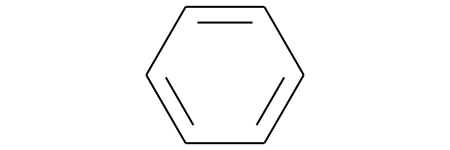

In [182]:
mols[0]

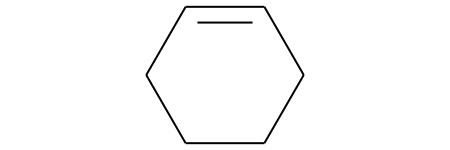

In [183]:
mols[1]

In [184]:
rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString

'[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1'

In [185]:
rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrderExact).smartsString

'[#6]'

In [186]:
rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrder).smartsString

'[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]'

#### Valence 고려해서 MCS 찾기. 

In [187]:
mols = (Chem.MolFromSmiles('NC1OC1'),Chem.MolFromSmiles('C1OC1[N+](=O)[O-]'))

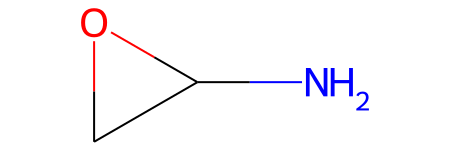

In [188]:
mols[0]

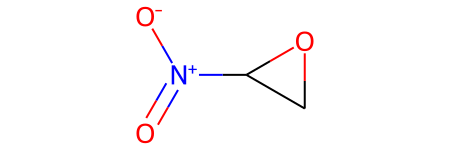

In [189]:
mols[1]

In [190]:
rdFMCS.FindMCS(mols).smartsString

'[#7]-[#6]1-[#8]-[#6]-1'

In [191]:
rdFMCS.FindMCS(mols).numAtoms

4

In [192]:
rdFMCS.FindMCS(mols, matchValences=True)

* Valence 까지 동일한 것을 고려하려면

In [193]:
rdFMCS.FindMCS(mols, matchValences=True).smartsString

'[#6]1-[#8]-[#6]-1'

### Ring에 관한 option

In [194]:
mols = [Chem.MolFromSmiles("C1CCC1CCC"), Chem.MolFromSmiles("C1CCCCCC1")]

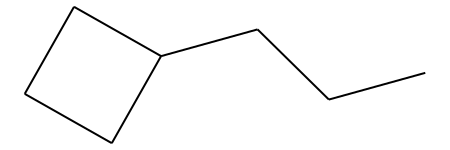

In [195]:
mols[0]

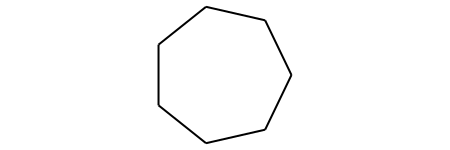

In [196]:
mols[1]

In [197]:
rdFMCS.FindMCS(mols).smartsString

'[#6](-[#6]-[#6])-[#6]-[#6]-[#6]-[#6]'

* Ring 안에 있는 원자들끼리만 따로 비교 할 때. 

In [198]:
rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString

'[#6&R](-&@[#6&R]-&@[#6&R])-&@[#6&R]'

* SMARTS 표현식에 Ring에 대한 정보가 명시적으로 들어가 있음을 알 수 있다.  

In [199]:
mols = [Chem.MolFromSmiles("CCC1CC2C1CN2"), Chem.MolFromSmiles("C1CC2C1CC2")]

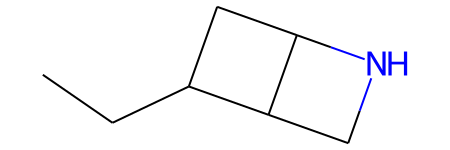

In [200]:
mols[0]

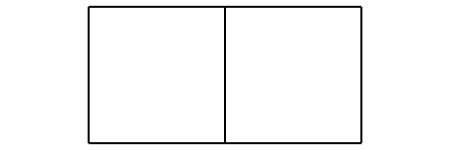

In [201]:
mols[1]

In [202]:
rdFMCS.FindMCS(mols).smartsString

'[#6]1-[#6]-[#6](-[#6]-1-[#6])-[#6]'

In [203]:
rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString

'[#6&R](-&@[#6&R]-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]'

In [204]:
rdFMCS.FindMCS(mols, completeRingsOnly=True).smartsString

'[#6]1-&@[#6]-&@[#6]-&@[#6]-&@1'

In [205]:
ms = [Chem.MolFromSmiles(x) for x in ('CC1CCC1','CCC1CC1',)]

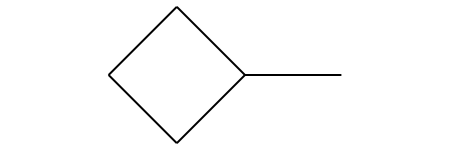

In [206]:
ms[0]

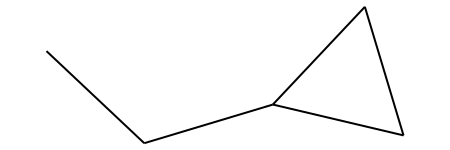

In [207]:
ms[1]

In [208]:
rdFMCS.FindMCS(ms,ringMatchesRingOnly=True).smartsString

'[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]'

In [209]:
rdFMCS.FindMCS(ms,completeRingsOnly=True).smartsString

'[#6]-&!@[#6]'

In [210]:
rdFMCS.FindMCS(ms,ringMatchesRingOnly=True,completeRingsOnly=True).smartsString

'[#6&!R]-&!@[#6&R]'

In [211]:
mols = [Chem.MolFromSmiles("Nc1ccccc1"*10), Chem.MolFromSmiles("Nc1ccccccccc1"*10)]

In [212]:
rdFMCS.FindMCS(mols, timeout=1).canceled

True

* 많은 개수 혹은 큰 분자의 MCS를 찾게되면 얼마나 걸릴지 테스트 해봅시다. 

In [ ]:
import timeit
timeit.timeit(rdFMCS.FindMCS(mols))